In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, fisher_exact, chi2_contingency, ttest_ind, f_oneway
import seaborn as sns


In [7]:
file_path = 'Statistiques/Données+entreprise+VertiGo+nettoyées.csv'
data = pd.read_csv(file_path)

In [9]:
data.head()

,Date,Nombre_de_Clients,Revenu_des_Ventes,Depenses_Publicitaires,Nombre_de_Reservations
0,01/01/23,54,5587,4817,226
1,02/01/23,48,4697,6374,321
2,03/01/23,56,5619,4354,207
3,04/01/23,65,6408,4200,205
4,05/01/23,47,4614,4517,258


### Analyse et Interpretation

### Analyse quantitative

#### Test de pearson

##### Les deux variables (Depenses_Publicitaires et Nombre_de_Reservations)

In [10]:
depenses = data['Depenses_Publicitaires']
reservations = data['Nombre_de_Reservations']

<Axes: xlabel='Depenses_Publicitaires', ylabel='Nombre_de_Reservations'>

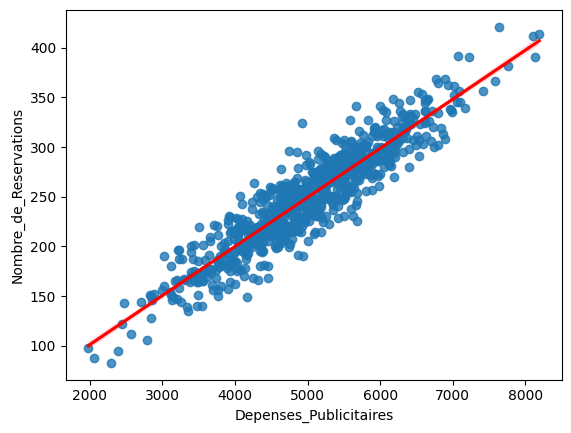

In [11]:
sns.regplot(x=depenses, y=reservations, line_kws=dict(color="r"))

Le nuage de point montre une correlation lineaire entre les deux variables, nous allons appliquer le test de Pearson pour valider cela, pour cela nous avons enoncé deux hypothèses ci-dessous :
- H0 : le coefficient de correlation n est pas significativement different de zero(pas de relation lineaire)
- H1 : le coefficient de correlation s'ecarte significativement de zero(relation lineaire)

In [16]:
# Calculer le coefficient de corrélation de Pearson et la valeur p
correlation, p_value = pearsonr(depenses, reservations)

print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.9260102639258713
Valeur p: 0.0


Coefficient de corrélation de Pearson (r) : Le coefficient de corrélation de 0,926 indique une forte corrélation positive entre les dépenses publicitaires et le nombre de réservations. Cela signifie que, à mesure que les dépenses publicitaires augmentent, le nombre de réservations augmente aussi.

Valeur p : La valeur p de 0,0 est inférieure au seuil de 0,05, indiquant que la corrélation est statistiquement significative. La relation observée n'est donc probablement pas due au simple hasard.

##### Les deux variables (les revenus de vente et le nombre de clients)

In [14]:
revenus = data['Revenu_des_Ventes']
nbr_client = data['Nombre_de_Clients']

<Axes: xlabel='Revenu_des_Ventes', ylabel='Nombre_de_Clients'>

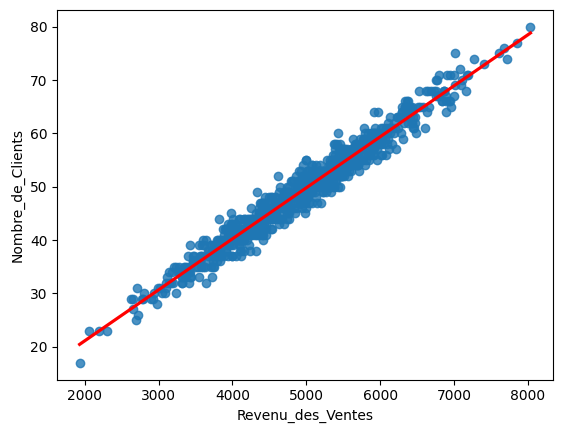

In [15]:
sns.regplot(x=revenus, y=nbr_client, line_kws=dict(color="r"))

Le nuage de point montre une correlation lineaire entre les deux variables, nous allons appliquer le test de Pearson pour valider cela, pour cela nous avons enoncé deux hypothèses ci-dessous :

- H0 : le coefficient de correlation n est pas significativement different de zero(pas de relation lineaire)
- H1 : le coefficient de correlation s'ecarte significativement de zero(relation lineaire)

In [16]:
# Calculer le coefficient de corrélation de Pearson et la valeur p
correlation, p_value = pearsonr(revenus, nbr_client)

print(f"Coefficient de corrélation de Pearson: {correlation}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.9798152684212378
Valeur p: 0.0


#### Test de Spearman

In [19]:
# Charger les données depuis le fichier Excel
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data1 = pd.read_csv(file_path_client)
data1.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget voyage annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


<Axes: xlabel='durée de voyage (en jours)', ylabel='prix total'>

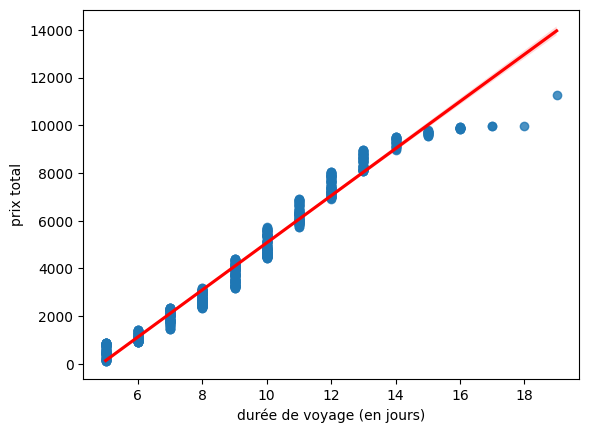

In [18]:
# Extraire les colonnes pertinentes
duree_sejours = data1['durée de voyage (en jours)']
prix_total = data1['prix total']

# Visualisation de la tendance
sns.regplot(data=data1, x="durée de voyage (en jours)", y="prix total", line_kws=dict(color="r"))



Le nuage de point montre une correlation lineaire entre les deux variables, nous allons appliquer le test de Spearman pour valider cela, pour cela nous avons enoncé deux hypothèses ci-dessous :

- H0 : le coefficient de correlation n est pas significativement different de zero(pas de relation lineaire)
- H1 : le coefficient de correlation s'ecarte significativement de zero(relation lineaire)

In [32]:
# Calculer le coefficient de corrélation de Spearman et la valeur p
spearman_corr, spearman_p_value = spearmanr(duree_sejours, prix_total)

print(f"Coefficient de corrélation de Spearman: {spearman_corr}")
print(f"Valeur p: {spearman_p_value}")

Coefficient de corrélation de Spearman: 0.9944396664577642
Valeur p: 0.0


Coefficient de corrélation de Spearman (ρ) : Le coefficient de corrélation de 0,994 indique une très forte corrélation positive entre la durée des séjours et le prix total des voyages. Cela signifie qu’il y a une tendance monotone entre les deux variables.

Valeur p : La valeur p de 0,0 est inférieure au seuil de 0,05, indiquant que la corrélation est statistiquement significative. La relation observée ne peut donc pas être due au hasard.

### Analyse qualitative

#### Test de fisher

In [22]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data1 = pd.read_csv(file_path_client)
data1.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget voyage annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


In [23]:
contingency_table_fm = pd.crosstab(data1['genre'], data1['type de voyage'])
print(contingency_table_fm)

type de voyage  aventure  culturel  détente
genre                                      
Autre                111       178      108
F                     61        89       51
M                     60        97       42


In [25]:
data1= data1[data1['genre'] != 'Autre']
data1["type de voyage"] = data1["type de voyage"].str.lower()

In [26]:

contingency_table_fm = pd.crosstab(data1['genre'], data1['type de voyage'])
print(contingency_table_fm)

type de voyage  aventure  culturel  détente
genre                                      
F                     61        89       51
M                     60        97       42


<Axes: xlabel='type de voyage', ylabel='nombre'>

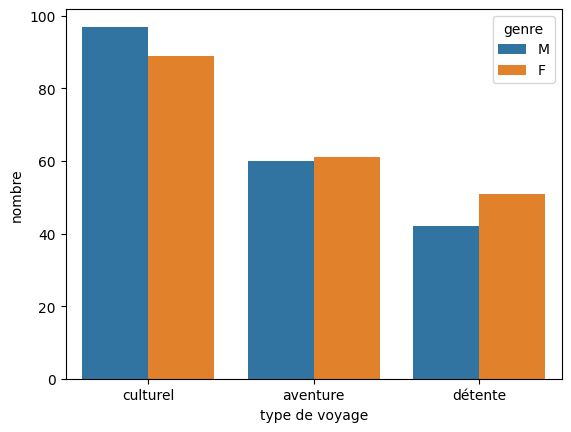

In [27]:
data1["nombre"] = 1
sns.barplot(data=data1, x='type de voyage',y="nombre", hue='genre', estimator='sum')

<Axes: xlabel='type de voyage', ylabel='genre'>

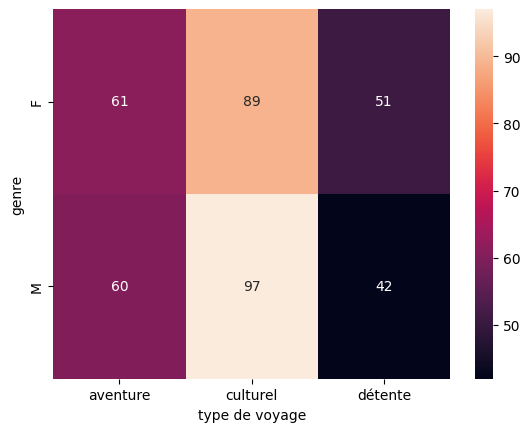

In [28]:
sns.heatmap(contingency_table_fm, annot=True)

In [60]:
contingency_table_2x2_fm = contingency_table_fm[['aventure', 'culturel']]
odds_ratio, p_value = fisher_exact(contingency_table_2x2_fm)
print(contingency_table_2x2_fm)

type de voyage  aventure  culturel
genre                             
F                     61        89
M                     60        97


- H0 : il n’y a pas d’association significative entre les deux variables catégorielles(pas de relation)
- H1 : il y a bien une association significative entre les deux variables catégorielles(relation)

In [61]:
print(f"Tableau de contingence 2x2:\n{contingency_table_2x2_fm}")
print(f"Odds Ratio: {odds_ratio}")
print(f"Valeur p: {p_value}")

Tableau de contingence 2x2:
type de voyage  aventure  culturel
genre                             
F                     61        89
M                     60        97
Odds Ratio: 1.108052434456929
Valeur p: 0.7261605285468693


L'odds ratio de 1,19 indique que les femmes ont pratiquement les mêmes chances de préférer les voyages d'aventure par rapport aux voyages culturels que les hommes. Cet odds ratio est très proche de 1, indiquant une quasi-égalité. Même si mathématiquement, il semble y avoir une légère probabilité supérieure pour les femmes, la valeur p va nous renseigner sur la significativité de cette différence.

La valeur p de 0,642 est bien supérieure au seuil de 0,05, ce qui signifie que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle. Par conséquent, il n'y a pas d'association statistiquement significative entre le genre et le type de voyage préféré pour les catégories "Aventure" et "Culturel".

#### Test de Khi2

In [2]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data1 = pd.read_csv(file_path_client)

In [3]:
contingency_table = pd.crosstab(data1['saison de voyage'], data1['type de voyage'])
print(contingency_table)

type de voyage    aventure  culturel  détente
saison de voyage                             
automne                 39        61       42
hiver                   80       119       58
printemps               31        52       37
été                     82       132       64


<Axes: xlabel='saison de voyage', ylabel='nombre'>

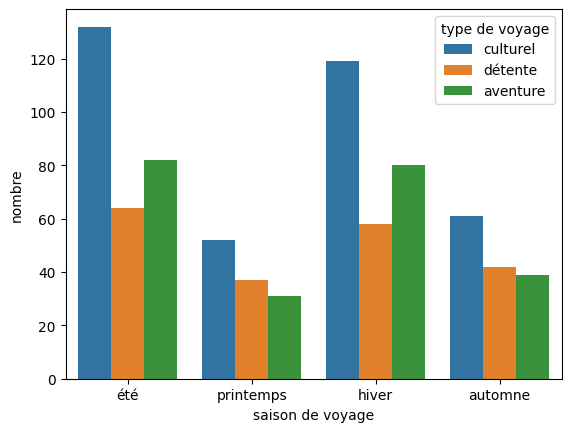

In [4]:
data1["nombre"] = 1
sns.barplot(data=data1, x='saison de voyage',y="nombre", hue='type de voyage', estimator='sum')

<Axes: xlabel='type de voyage', ylabel='saison de voyage'>

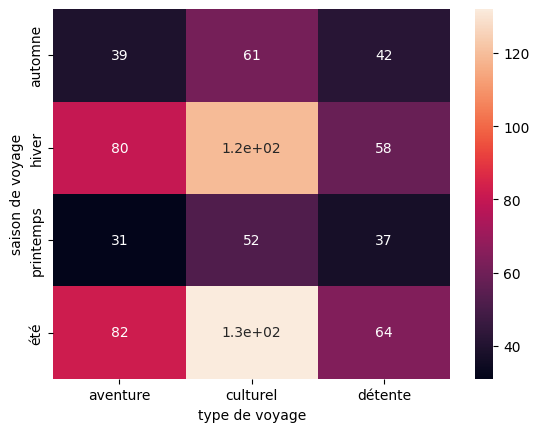

In [5]:
sns.heatmap(contingency_table, annot=True)

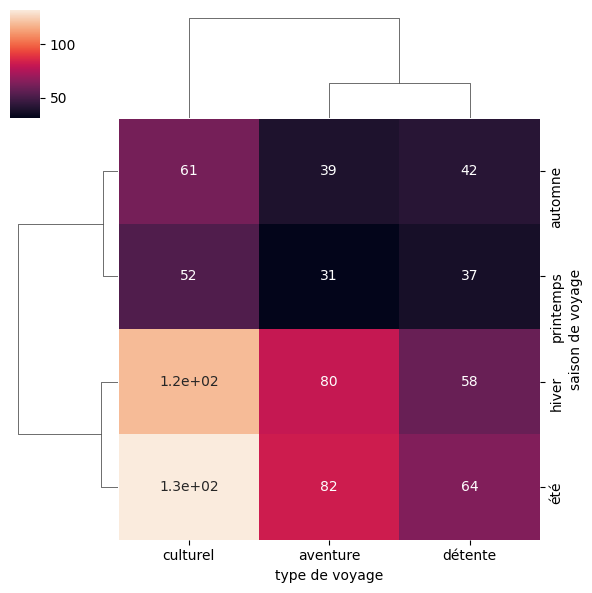

In [6]:
sns.clustermap(contingency_table, annot=True, figsize=(6,6))

- H0 : La saison de voyage est indépendante du type de voyage préféré.
- H1 : La saison de voyage dépend du type de voyage préféré.

In [73]:

# Calculer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique Chi-2: 5.361010511657164
Valeur p: 0.498412008351371
Degrés de liberté: 6
Fréquences attendues:
[[ 41.33500627  64.8531995   35.81179423]
 [ 74.81053952 117.37515684  64.81430364]
 [ 34.93099122  54.8055207   30.26348808]
 [ 80.92346299 126.96612296  70.11041405]]


Statistique Chi-2 : La statistique Chi-2 de 5,392 indique la somme des écarts au carré entre les fréquences observées et attendues.

Valeur p : La valeur p de 0,494 est supérieure au seuil de 0,05, indiquant que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle H0​. 

##### Les deux variables (les destinations des clients et la saison)

In [2]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data1 = pd.read_csv(file_path_client)

In [3]:
data1.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget voyage annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


In [4]:
saison = data1['saison de voyage']
destination = data1['destination']

In [6]:
contingency_table1 = pd.crosstab(saison, destination)
print(contingency_table1)

destination       Australie  Bali  Brésil  Costa Rica  France  Islande  Japon  \
saison de voyage                                                                
automne                   9    19       7          14       8       14     10   
hiver                    23    23      17          22      32       15     17   
printemps                 7    11      12          10       8        3     10   
été                      18    36      24          26      32       18     22   

destination       Maroc  Norvège  Népal  Pérou  Vietnam  
saison de voyage                                         
automne              10       14     15     12       10  
hiver                10       24     30     23       21  
printemps             8       20     12     12        7  
été                  17       18     26     20       21  


<Axes: xlabel='saison de voyage', ylabel='nombre'>

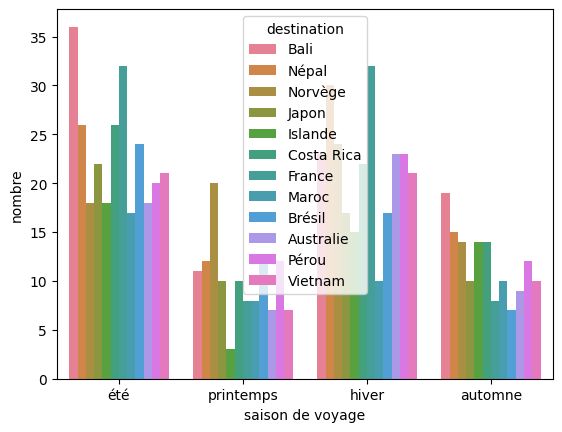

In [14]:
data1["nombre"] = 1
sns.barplot(data=data1, x='saison de voyage',y="nombre", hue=data1['destination'], estimator='sum')

<Axes: xlabel='destination', ylabel='saison de voyage'>

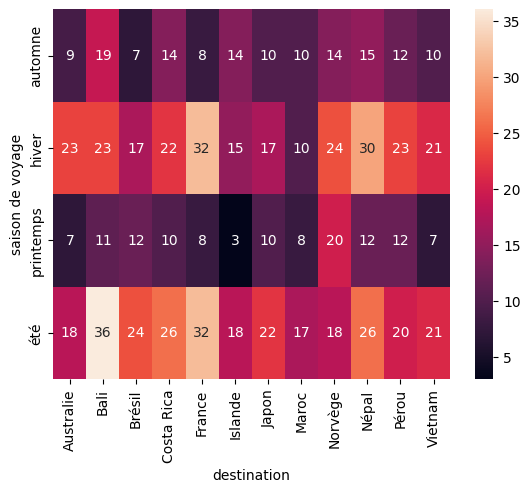

In [15]:
sns.heatmap(contingency_table1, annot=True)

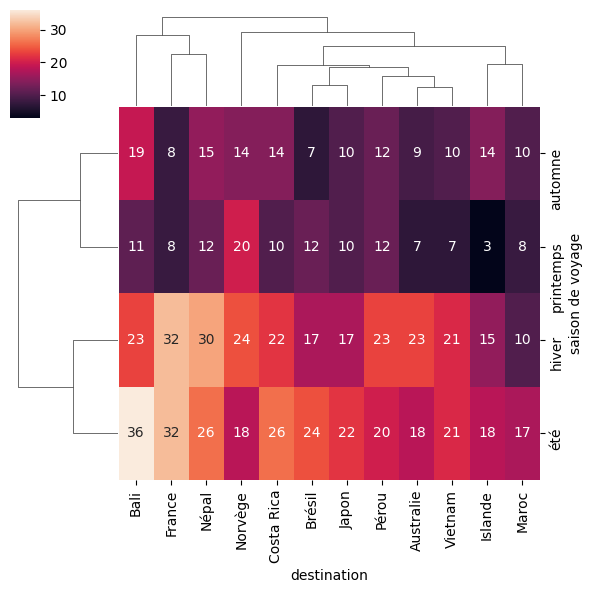

In [7]:
sns.clustermap(contingency_table1, annot=True, figsize=(6,6))

- H0 : La saison de voyage n'a pas une relation significative avec la destination.
- H1 : La saison de voyage a une relation significative avec la destination.

In [8]:
# Calculer le test du Chi-2
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table1)

print(f"Statistique Chi-2: {chi2_stat}")
print(f"Valeur p: {p_value}")
print(f"Degrés de liberté: {dof}")
print("Fréquences attendues:")
print(expected)

Statistique Chi-2: 34.0626345791265
Valeur p: 0.41629390328055044
Degrés de liberté: 33
Fréquences attendues:
[[10.15558344 15.85696361 10.69008783 12.8281054  14.25345044  8.90840652
  10.5119197   8.01756587 13.54077792 14.78795483 11.93726474 10.5119197 ]
 [18.38017566 28.69887077 19.34755332 23.21706399 25.79673777 16.1229611
  19.0250941  14.51066499 24.50690088 26.76411543 21.60476788 19.0250941 ]
 [ 8.58218319 13.40025094  9.03387704 10.84065245 12.04516939  7.52823087
   8.88331242  6.77540778 11.44291092 12.49686324 10.08782936  8.88331242]
 [19.88205772 31.04391468 20.92848181 25.11417817 27.90464241 17.44040151
  20.57967378 15.69636136 26.50941029 28.9510665  23.37013802 20.57967378]]


Statistique Chi-2 : La statistique Chi-2 de 34.06 indique la somme des écarts au carré entre les fréquences observées et attendues.

Valeur p : La valeur p de 0.416 est supérieure au seuil de 0,05, indiquant que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle H0​.

#### Test de T

In [74]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data = pd.read_csv(file_path_client)

<Axes: xlabel='saison de voyage', ylabel='évaluation sur 5'>

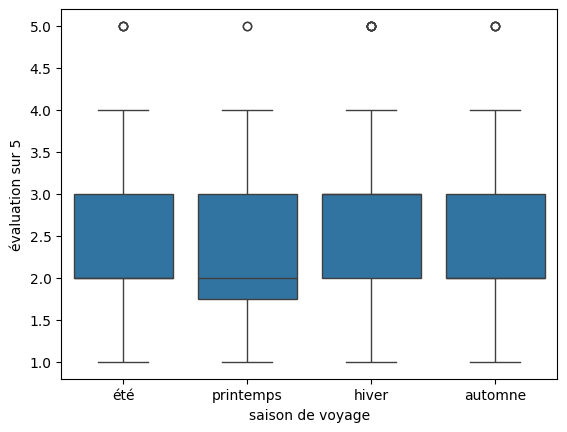

In [76]:
sns.boxplot(x="saison de voyage", y="évaluation sur 5", data=data)

In [80]:
# Filtrer les données pour ne garder que les saisons été et hiver
data_filtered = data[data['saison de voyage'].isin(['été', 'hiver'])]

# Sélectionner les colonnes pertinentes
ete = data_filtered[data_filtered['saison de voyage'] == 'été']['évaluation sur 5'].dropna()
hiver = data_filtered[data_filtered['saison de voyage'] == 'hiver']['évaluation sur 5'].dropna()

# Calculer le test T et la valeur p
t_stat, p_value = ttest_ind(ete, hiver, equal_var=False)  # Utilisation de equal_var=False par défaut

print(f"Statistique de test T: {t_stat}")
print(f"Valeur p: {p_value}")

Statistique de test T: -1.2776660666064572
Valeur p: 0.2019362945385028


La statistique de test T quantifie l'écart entre les moyennes des deux groupes en tenant compte de la variabilité des données au sein de chaque groupe. Une valeur T négative indique que la moyenne des évaluations pour l'été est inférieure à celle de l'hiver, mais nous devons examiner la valeur p pour tirer des conclusions sur la significativité de cette différence.

La valeur p de 0,179 est supérieure au seuil de 0,05. Cela signifie que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle, qui stipule qu'il n'y a pas de différence significative entre les évaluations des saisons été et hiver.

La différence observée entre les évaluations des saisons été et hiver n'est pas statistiquement significative. Autrement dit, nous ne pouvons pas conclure qu'il y a une différence réelle entre les évaluations pour ces deux saisons.



#### Test Anova

In [84]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data_ANOVA = pd.read_csv(file_path_client)

Statistique de test F: 0.7032631045471558
Valeur p: 0.49527558016206863


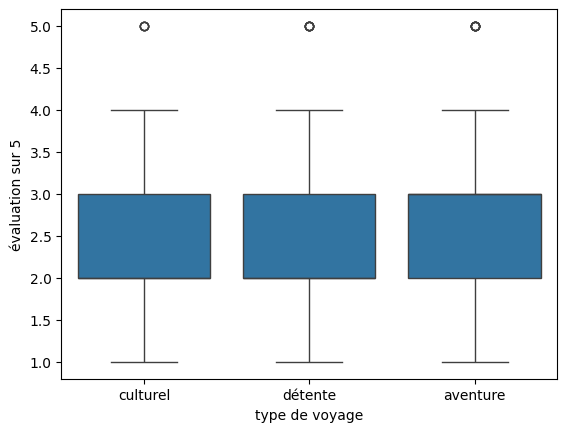

In [85]:
sns.boxplot(x="type de voyage", y="évaluation sur 5", data=data_ANOVA)

# Sélectionner les colonnes pertinentes pour chaque type de voyage
aventure = data_ANOVA[data_ANOVA['type de voyage'] == 'aventure']['évaluation sur 5'].dropna()
detente = data_ANOVA[data_ANOVA['type de voyage'] == 'détente']['évaluation sur 5'].dropna()
culturel = data_ANOVA[data_ANOVA['type de voyage'] == 'culturel']['évaluation sur 5'].dropna()

# Calculer le test ANOVA et la valeur p
f_stat, p_value = f_oneway(aventure, detente, culturel)

print(f"Statistique de test F: {f_stat}")
print(f"Valeur p: {p_value}")

Le boxplot permet de clairement voir une absence de différence des notes données pour les différents types de voyages. On ne s’attend donc pas à obtenir quelque chose de significatif avec le test statistique.

La statistique de test F compare la variation entre les groupes à la variation au sein de chaque groupe. Une valeur F aussi faible suggère une absence de différence entre les moyennes des groupes.

La valeur p indique la probabilité que la différence observée entre les groupes soit due au hasard. Une valeur p supérieure au seuil de 0,05 indique que la différence n’est pas statistiquement significative.

Ainsi, nous n’observons pas de différence significative entre les évaluations des types de voyage (aventure, détente, culturel).


##### Les deux variables (L'âge moyen et trois groupes(aventure, détente, culturel))


In [9]:
file_path_client = 'Statistiques/Données+clients+VertiGo+nettoyées.csv'
data_ANOVA = pd.read_csv(file_path_client)

In [10]:
data_ANOVA.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget voyage annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


<Axes: xlabel='type de voyage', ylabel='âge'>

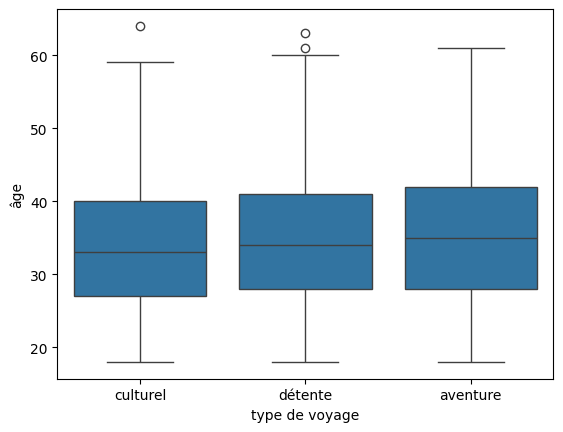

In [13]:
sns.boxplot(x="type de voyage", y="âge", data=data_ANOVA)

Le boxplot permet de clairement voir une absence de différence des notes données pour les différents types de voyages. On ne s’attend donc pas à obtenir quelque chose de significatif avec le test statistique.

In [14]:
aventure = data_ANOVA[data_ANOVA['type de voyage'] == 'aventure']['âge'].dropna()
detente = data_ANOVA[data_ANOVA['type de voyage'] == 'détente']['âge'].dropna()
culturel = data_ANOVA[data_ANOVA['type de voyage'] == 'culturel']['âge'].dropna()

- H0 : Il n'y a pas une variation significative entre L'âge moyen des clients et le type de voyage
- H1 : Il y a une variation significative entre L'âge moyen des clients et le type de voyage

In [19]:
# Calculer le test ANOVA et la valeur p
f_stat, p_value = f_oneway(aventure, detente, culturel)
print(f"Statistique de test F: {f_stat}")
print(f"Valeur p: {p_value}")

Statistique de test F: 1.4280350195804545
Valeur p: 0.24039477905682843


La statistique de test F compare la variation entre les groupes à la variation au sein de chaque groupe. Une valeur F aussi faible suggère une absence de différence entre les moyennes des groupes.

La valeur p indique la probabilité que la différence observée entre les groupes soit due au hasard. On a une valeur de p supérieure au seuil de 0,05 ce qui indique que la différence n’est pas statistiquement significative. H0 n est pas rejetée